In [1]:
import numpy as np
from scipy import stats 

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.distributions.empirical_distribution import ECDF

## Задание 1

1. Смоделировать 4 выборки объемом 1000 из разных законов распределения: нормальное, экспоненциальное, равномерное и любой 
другой закон распределения на выбор.

In [2]:
sample = np.random.normal(loc = 0, scale = 1, size = 1000)

In [3]:
normal_distribution = stats.norm(loc=0, scale=1)
sample = normal_distribution.rvs(size=1000)

2. Для каждой выборки посчитать описательные характеристики (минимум и максимум, мат. ожидание, дисперсия, стандартное 
отклонение, квантили уровней 0.25 и 0.75, размах, медиана, коэффициенты асимметрии и эксцесса). 

In [4]:
def calc_descriptive_characteristics(sample):
    min_value = np.min(sample) # минимум
    max_value = np.max(sample) # максимум
    avg_value = sample.mean() # мат. ожидание
    var_value = sample.var() # дисперсия
    std_value = sample.std() # среднее квадратичное отклонение
    quartiles = np.quantile(sample, [0.25, 0.75])
    q75_value = quartiles[1] # 0.75-квантиль
    q25_value = quartiles[0] # 0.25-квантиль
    rng_value = np.ptp(sample) # размах
    mdn_value = np.median(sample) # медиана
    skw_value = stats.skew(sample) # коэффициент ассиметрии
    krt_value = stats.kurtosis(sample) # эксцесс
    
    return {'min':min_value, # минимум
            'max':max_value, # максимум
            'avg':avg_value, # мат. ожидание
            'var':var_value, # дисперсия
            'std':std_value, # среднее квадратичное отклонение
            'q25':q25_value, # 0.25-квантиль 
            'q75':q75_value, # 0.75-квантиль
            'rng':rng_value, # размах 
            'mdn':mdn_value, # медиана
            'skw':skw_value, # коэффициент ассиметрии
            'krt':krt_value, # эксцесс
           }

In [5]:
calc_descriptive_characteristics(sample)

{'min': -2.941196050170501,
 'max': 2.9911644114143945,
 'avg': 0.0221515254132521,
 'var': 0.9970220604319241,
 'std': 0.9985099200468286,
 'q25': -0.637295943581804,
 'q75': 0.7059455121207535,
 'rng': 5.932360461584896,
 'mdn': 0.02577409873277836,
 'skw': -0.009049610134804521,
 'krt': -0.020003135744941947}

3. Визуализировать полученные выборки, используя гистограммы и диаграммы «Ящик с усами», построить эмпирические функцию и 
плотность распределения. 

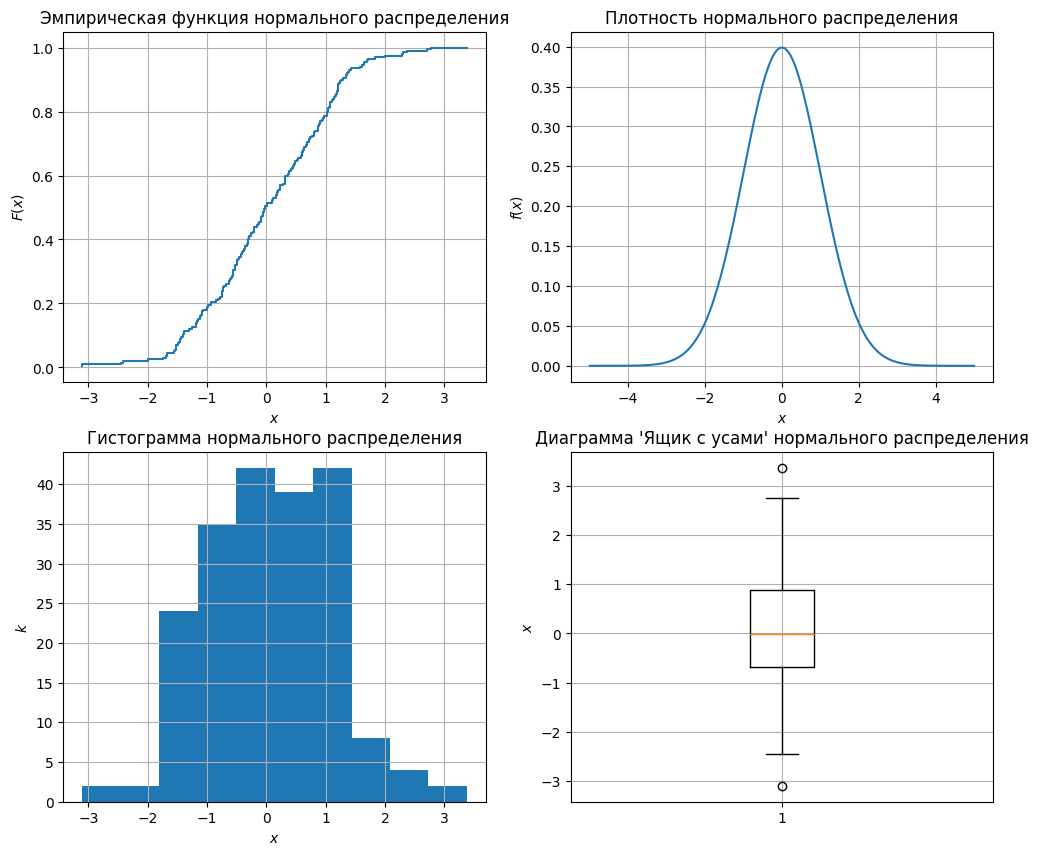

In [6]:
x = np.linspace(-5, 5, 200)
pdf = normal_distribution.pdf(x)
sample = normal_distribution.rvs(size=200)
ecdf = ECDF(sample)

plt.figure(figsize=(12, 10))
# Эмпирическая функция распределения
plt.subplot(221)
plt.step(ecdf.x, ecdf.y, label='F_n(x)')
plt.title("Эмпирическая функция нормального распределения")
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.grid()
# Плотность распределения
plt.subplot(222)
plt.plot(x, pdf, label='f(x)')
plt.title("Плотность нормального распределения")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.grid()
# Гистограмма
plt.subplot(223)
plt.hist(sample)
plt.title("Гистограмма нормального распределения")
plt.ylabel('$k$')
plt.xlabel('$x$')
plt.grid()
# Ящик с усами
plt.subplot(224)
plt.boxplot(sample)
plt.title("Диаграмма '"'Ящик с усами'"' нормального распределения")
plt.ylabel('$x$')
plt.grid()

plt.show()

## Задание 2

1. Выбрать параметры для нормального распределения. 
2. По 1000 раз смоделировать с выбранными параметрами выборки объема: 10, 50, 100, 1000. 

In [9]:
normal_dist = stats.norm(loc=5, scale=10)

In [10]:
samples_10 = normal_dist.rvs(size=(1000, 10))

In [11]:
means_10 = [sample.mean() for sample in samples_10]

3. Построить гистограмму средних. 

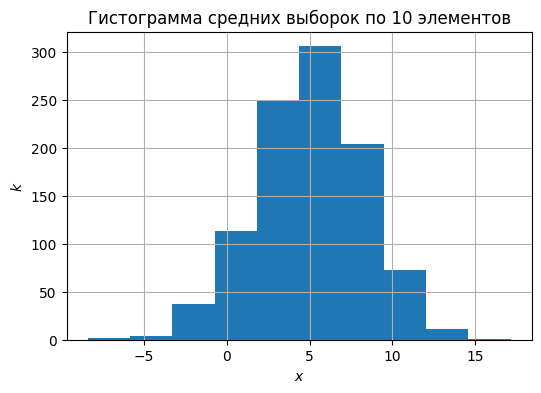

In [12]:
plt.figure(figsize=(6, 4))

plt.hist(means_10)
plt.title("Гистограмма средних выборок по 10 элементов")
plt.ylabel('$k$')
plt.xlabel('$x$')
plt.grid()
plt.show()

4. Посчитать выборочные среднее, стандартное отклонение и коэффициент вариации для каждого объема выборки.

In [13]:
mean = np.mean(means_10)
std = np.std(means_10)
cv = std / mean
print(mean, std, cv)

5.018914249749183 3.2488080871855782 0.6473129297532699


При многократном повторении эксперимента выборочные средние симметричным образом распределятся вокруг среднего значения генеральной совокупности, а стандартное отклонение такого распределения выборочных средних есть стандартная ошибка среднего.

С ростом объема выборки распределение приближается к нормальному $N(m,σ/√n)$ и происходит концентрация псевдослучайных величин вокруг выборочного среднего, а выборочное среднее приближается к математическому ожиданию исходного распределения.

## Задание 3

1. Сгенерируйте выборку из стандартного нормального распределения. 
2. Для каждого 𝑛 постройте эмпирическую функцию распределения 𝐹𝑛 и посчитайте значение статистики
$$𝐷_𝑛 = sup|𝐹_𝑛(𝑥) − 𝐹(𝑥)|$$

In [14]:
x = np.linspace(-3, 3, 1000)
normal_dist = stats.norm(loc=0, scale=3)

In [15]:
sample = normal_dist.rvs(size=50)

cdf = normal_dist.cdf
ecdf = ECDF(sample)
D = max(abs(ecdf(x) - cdf(x)))
D

0.12928223899092162

In [16]:
sample = normal_dist.rvs(size=1000)

cdf = normal_dist.cdf
ecdf = ECDF(sample)
D = max(abs(ecdf(x) - cdf(x)))
D

0.016678420734714705